In [1]:
#!kaggle datasets download -d sumansid/facemask-dataset
# !jar xf facemask-dataset.zip

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random
from PIL import Image

from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# mask_data = os.listdir('Mask/Mask/')
# no_mask_data = os.listdir('No Mask/No Mask/')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Mask/Mask/'

In [3]:
# print('mask - {}'.format(len(mask_data)))
# print('no_mask - {}'.format(len(no_mask_data)))

In [4]:
# os.makedirs('./train/mask')
# os.makedirs('./train/no_mask')
# os.makedirs('./test/mask')
# os.makedirs('./test/no_mask')

In [5]:
# train_ratio = 0.7
# for img in mask_data[:len(mask_data)*7//10]:
#     shutil.copy('Mask/Mask/'+img, './train/mask')

# for img in mask_data[len(mask_data)*7//10:]:
#     shutil.copy('Mask/Mask/'+img, './test/mask')

# for img in no_mask_data[:len(no_mask_data)*7//10]:
#     shutil.copy('No Mask/No Mask/'+img, './train/no_mask')

# for img in no_mask_data[len(no_mask_data)*7//10:]:
#     shutil.copy('No Mask/No Mask/'+img, './test/no_mask')

In [6]:
# train_mask_data = os.listdir('train/mask')
# train_no_mask_data = os.listdir('train/no_mask')
# test_mask_data = os.listdir('test/mask')
# test_no_mask_data = os.listdir('test/no_mask')

In [7]:
# print('train/mask - {}'.format(len(train_mask_data)))
# print('train/no_mask - {}'.format(len(train_no_mask_data)))
# print('test/mask - {}'.format(len(test_mask_data)))
# print('test/no_mask - {}'.format(len(test_no_mask_data)))

train/mask - 145
train/no_mask - 91
test/mask - 63
test/no_mask - 40


In [2]:
IMAGE_SIZE = [64, 64]

In [7]:
# t = Image.open('train/with_mask/' + train_mask_data[0])
# t = t.resize(IMAGE_SIZE)
# plt.imshow(t)

In [4]:
train_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
    flow_from_directory('./train', target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')
test_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
    flow_from_directory('./test', target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')

Found 3257 images belonging to 3 classes.
Found 815 images belonging to 3 classes.


In [5]:
train_batch.class_indices, test_batch.class_indices

({'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2},
 {'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2})

In [11]:
# class_mask = ['mask', 'no_mask']

## VGG16

In [6]:
INPUT_SIZE = IMAGE_SIZE+[3]
vgg = VGG16(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
# vgg.summary()

In [7]:
x = Flatten()(vgg.output)
pred_layer = Dense(3, activation='softmax')(x)

In [8]:
model = Model(inputs = vgg.input, outputs = pred_layer)
# model.summary()

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [1]:
history = model.fit(train_batch, validation_data=test_batch, epochs=15, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))

NameError: name 'model' is not defined

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

In [ ]:
#save model
# os.makedirs('./models')
# model.save('.\models')

In [21]:
len(model.layers)

21

In [22]:
## FINE TUNE
vgg.trainable = True
# for layer in model.layers[250:]:
#     layer.trainable = True

print(len(model.trainable_variables))
# model.summary()
    
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_batch, validation_data=test_batch, epochs=25, initial_epoch=history.epoch[-1])

28
Epoch 15/25
8/8 [==============================] - 8s 718ms/step - loss: 0.2237 - accuracy: 0.9498 - val_loss: 0.3503 - val_accuracy: 0.8835
Epoch 16/25
8/8 [==============================] - 4s 548ms/step - loss: 0.1999 - accuracy: 0.9269 - val_loss: 0.3457 - val_accuracy: 0.8641
Epoch 17/25
8/8 [==============================] - 5s 629ms/step - loss: 0.2308 - accuracy: 0.9343 - val_loss: 0.3551 - val_accuracy: 0.8155
Epoch 18/25
8/8 [==============================] - 5s 562ms/step - loss: 0.2258 - accuracy: 0.9189 - val_loss: 0.2777 - val_accuracy: 0.9029
Epoch 19/25
8/8 [==============================] - 4s 554ms/step - loss: 0.2117 - accuracy: 0.9233 - val_loss: 0.2904 - val_accuracy: 0.8738
Epoch 20/25
8/8 [==============================] - 4s 545ms/step - loss: 0.1850 - accuracy: 0.9488 - val_loss: 0.3146 - val_accuracy: 0.8447
Epoch 21/25
8/8 [==============================] - 4s 559ms/step - loss: 0.1655 - accuracy: 0.9295 - val_loss: 0.2969 - val_accuracy: 0.8835
Epoch 22/2

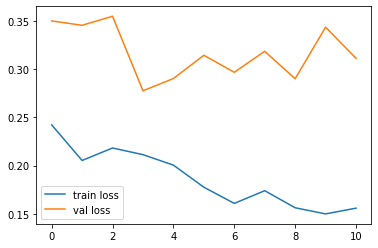

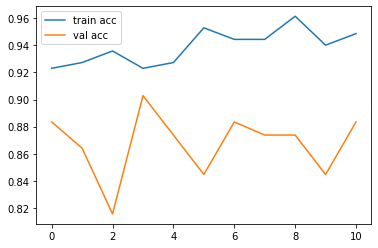

In [23]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

In [26]:
#save model
# os.makedirs('./models')
# model.save('models/vgg_mask.h5')

## InceptionV3

In [88]:
INPUT_SIZE = IMAGE_SIZE+[3]
inception = InceptionV3(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
# for layer in inception.layers:
#     layer.trainable = False
inception.trainable = False
# inception.summary()

In [89]:
x = Dropout(0.3)(inception.output)
x = Dense(512, activation='relu')(x)
x = Flatten()(x)
pred_layer = Dense(2, activation='softmax')(x)

In [90]:
model = Model(inputs = inception.input, outputs = pred_layer)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 37, 37, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 37, 37, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 37, 37, 32)   0           batch_normalization_470[0][0]    
____________________________________________________________________________________________

In [91]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_batch, validation_data=test_batch, epochs=5)

Epoch 1/5
8/8 [==============================] - 8s 753ms/step - loss: 0.7831 - accuracy: 0.6839 - val_loss: 0.4410 - val_accuracy: 0.8544
Epoch 2/5
8/8 [==============================] - 4s 560ms/step - loss: 0.3172 - accuracy: 0.8943 - val_loss: 0.4016 - val_accuracy: 0.8544
Epoch 3/5
8/8 [==============================] - 4s 586ms/step - loss: 0.2805 - accuracy: 0.9049 - val_loss: 0.2278 - val_accuracy: 0.9029
Epoch 4/5
8/8 [==============================] - 4s 586ms/step - loss: 0.1317 - accuracy: 0.9526 - val_loss: 0.3092 - val_accuracy: 0.9223
Epoch 5/5
8/8 [==============================] - 4s 542ms/step - loss: 0.1887 - accuracy: 0.9318 - val_loss: 0.2605 - val_accuracy: 0.9029


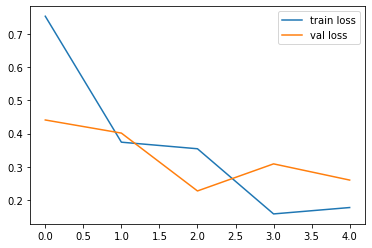

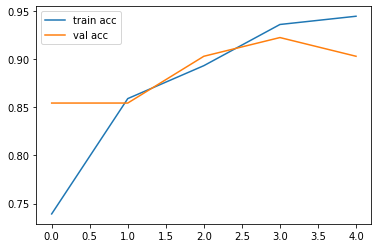

In [92]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

In [93]:
len(model.layers)

315

In [94]:
## FINE TUNE
# inception.trainable = True

for layer in model.layers[250:]:
    layer.trainable = True
print(len(model.trainable_variables))
model.summary()
    
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_batch, validation_data=test_batch, epochs=10, initial_epoch=history.epoch[-1])

39
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 37, 37, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 37, 37, 32)   96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 37, 37, 32)   0           batch_normalization_470[0][0]    
_________________________________________________________________________________________

Epoch 5/10
8/8 [==============================] - 10s 871ms/step - loss: 1.1614 - accuracy: 0.6630 - val_loss: 0.2587 - val_accuracy: 0.8932
Epoch 6/10
8/8 [==============================] - 4s 572ms/step - loss: 1.1608 - accuracy: 0.6857 - val_loss: 0.4022 - val_accuracy: 0.8932
Epoch 7/10
8/8 [==============================] - 4s 580ms/step - loss: 0.8946 - accuracy: 0.7293 - val_loss: 0.2413 - val_accuracy: 0.9320
Epoch 8/10
8/8 [==============================] - 4s 549ms/step - loss: 0.6809 - accuracy: 0.7717 - val_loss: 0.3348 - val_accuracy: 0.8641
Epoch 9/10
8/8 [==============================] - 4s 592ms/step - loss: 0.7791 - accuracy: 0.7745 - val_loss: 0.2983 - val_accuracy: 0.9223
Epoch 10/10
8/8 [==============================] - 4s 550ms/step - loss: 0.6281 - accuracy: 0.7969 - val_loss: 0.2980 - val_accuracy: 0.8932


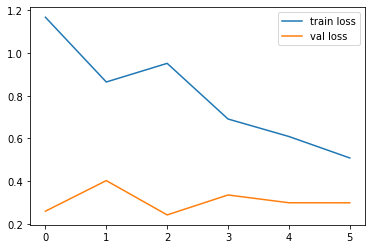

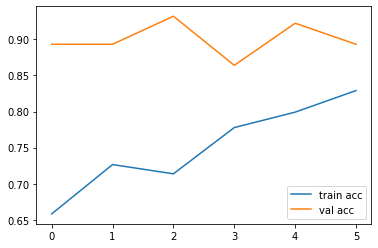

In [95]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

## Custom Model

In [41]:
INPUT_SIZE = IMAGE_SIZE=[3]
model = Sequential([
    Input(shape=INPUT_SIZE),
    
    Conv2D(32, 7, activation='relu'),
    MaxPooling2D(7),
    
    Conv2D(16, 7, activation='relu'),
    MaxPooling2D(7),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
])
# model.summary()

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_batch, validation_data=test_batch, epochs=5, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))

Epoch 1/5
8/8 [==============================] - 6s 754ms/step - loss: 0.6763 - accuracy: 0.6541 - val_loss: 0.6627 - val_accuracy: 0.6117
Epoch 2/5
8/8 [==============================] - 5s 620ms/step - loss: 0.6699 - accuracy: 0.5954 - val_loss: 0.6656 - val_accuracy: 0.6117
Epoch 3/5
8/8 [==============================] - 5s 709ms/step - loss: 0.6523 - accuracy: 0.6606 - val_loss: 0.6593 - val_accuracy: 0.6117
Epoch 4/5
8/8 [==============================] - 5s 715ms/step - loss: 0.6364 - accuracy: 0.6396 - val_loss: 0.6578 - val_accuracy: 0.6117
Epoch 5/5
8/8 [==============================] - 5s 691ms/step - loss: 0.6437 - accuracy: 0.6245 - val_loss: 0.6470 - val_accuracy: 0.6117


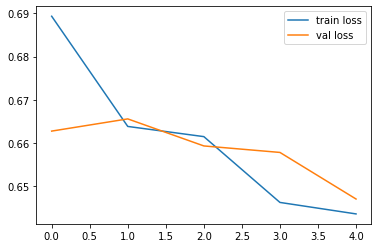

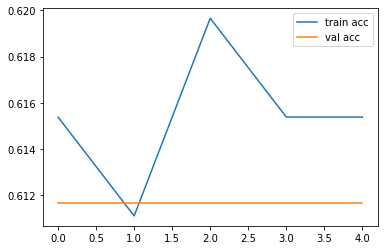

In [44]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_284 (Conv2D)          (None, 122, 122, 32)      4736      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_285 (Conv2D)          (None, 11, 11, 16)        25104     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
dense_7 (Dense)              (None, 1, 1, 64)          1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
dense_8 (Dense)              (None, 1, 1, 32)         

## Keras Tuner

In [59]:
import keras_tuner as kt
from tensorflow.keras.callbacks import TensorBoard

In [55]:
def build_model(hp):
    model = Sequential([
        Input(shape=IMAGE_SIZE),

        Conv2D(hp.Choice('filters_1', values=[16, 32, 64]), hp.Int('kernel_1', 2, 7, step=1), activation='tanh'),
        MaxPooling2D(hp.Int('pooling_1', 2, 7, step=1)),

        Conv2D(hp.Choice('filters_2', values=[16, 32, 64]), hp.Int('kernel_1', 2, 7, step=1), activation='tanh'),
        MaxPooling2D(hp.Int('pooling_2', 2, 7, step=1)),

        Dense(hp.Choice('dense_1', values=[16, 32, 64]), activation='tanh'),
        Dropout(hp.Float('droput_1', 0.1, 0.6, step=0.1)),
        Dense(hp.Choice('dense_2', values=[16, 32, 64]), activation='tanh'),
        Flatten(),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [56]:
# os.makedirs('./keras_tuner_logs')

In [80]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='\keras_tuner_logs',
    project_name='face_mask_detection',
    overwrite=True
)

In [81]:
# os.makedirs('./keras_tuner_logs/tb_logs')

In [82]:
tb = TensorBoard('/keras_tuner_logs/tb_logs')

In [83]:
tuner.search(train_batch, validation_data=test_batch, epochs=5, callbacks=[tb])

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.6019417643547058

Best val_accuracy So Far: 0.7281553149223328
Total elapsed time: 00h 05m 29s
INFO:tensorflow:Oracle triggered exit


In [84]:
%load_ext tensorboard

%tensorboard --logdir /keras_tuner_logs/tb_logs